# XRADIO Demo

XRADIO is an open-source Python package that leverages [xarray](https://github.com/pydata/xarray) to provide an interface for radio astronomy data. It includes converters from legacy formats and contains versioned schemas for each dataset type. A schema checker is also included to verify if a dataset conforms to the schema.

Data is organized into:

- [xarray Datasets](https://docs.xarray.dev/en/stable/generated/xarray.Dataset.html): A multi-dimensional, in-memory, array database of labeled n-dimensional arrays.
- `XRADIO Processing Sets`: XRADIO-specific data structure, based on a Python dictionary, that consists of a collection of `xarray Datasets`. We will be looking into replacing the processing set with [xarray Datatree](https://xarray-datatree.readthedocs.io/en/latest/) in the future.

## Import xradio

In [1]:
import os, pprint
from importlib.metadata import version

try:
    os.system("pip install --upgrade xradio[all]")

    import xradio

    print("Using xradio version", version("xradio"))

except ImportError as exc:
    print(f"Could not import xradio: {exc}")

Using xradio version 0.0.57


## Download example MSv2

### Available Datasets

In [2]:
from toolviper.utils.data import list_files

list_files()

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ file                                    ┃ dtype          ┃ telescope   ┃ size      ┃ mode                       ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ ea25_cal_small_before_fixed.split.ms    │ CASA MS v2     │ VLA         │ 150170225 │ Holography                 │
├─────────────────────────────────────────┼────────────────┼─────────────┼───────────┼────────────────────────────┤
│ ea25_cal_small_after_fixed.split.ms     │ CASA MS v2     │ VLA         │ 150031008 │ Holography                 │
├─────────────────────────────────────────┼────────────────┼─────────────┼───────────┼────────────────────────────┤
│ J1924-2914.ms.calibrated.split.SPW3     │ CASA MS v2     │ ALMA        │ 35000000  │ Holography                 │
├─────────────────────────────────────────┼────────────────┼─────────────┼───────────┼────────────────────────────┤
│ extract_holog_verification.json         │ json           │ na          │ 967       │ na                         │
├─────────────────────────────────────────┼────────────────┼─────────────┼───────────┼────────────────────────────┤
│ holog_numerical_verification.json       │ json           │ na          │ 1033      │ na                         │
├─────────────────────────────────────────┼────────────────┼─────────────┼───────────┼────────────────────────────┤
│ locit-input-pha.cal                     │ CASA Cal Table │ VLA         │ 92293     │ antenna location cal table │
├─────────────────────────────────────────┼────────────────┼─────────────┼───────────┼────────────────────────────┤
│ panel_cutoff_mask                       │ npy            │ na          │ 27150     │ na                         │
├─────────────────────────────────────────┼────────────────┼─────────────┼───────────┼────────────────────────────┤
│ heuristic_model                         │ bin            │ na          │ 556       │ na                         │
├─────────────────────────────────────────┼────────────────┼─────────────┼───────────┼────────────────────────────┤
│ panel_test_files                        │ na             │ na          │ 402916    │ na                         │
├─────────────────────────────────────────┼────────────────┼─────────────┼───────────┼────────────────────────────┤
│ AA2-Mid-sim_00000.ms                    │ CASA MS v2     │ SKA Mid     │ 14710912  │ Simulated Interferometer   │
├─────────────────────────────────────────┼────────────────┼─────────────┼───────────┼────────────────────────────┤
│ Antennae_M8.img.zarr                    │ zarr           │ ALMA        │ 12626417  │ Interferometer Mosaic      │
├─────────────────────────────────────────┼────────────────┼─────────────┼───────────┼────────────────────────────┤
│ Antennae_North.cal.lsrk.ms              │ CASA MS v2     │ ALMA        │ 189716793 │ Interferometer Mosaic      │
├─────────────────────────────────────────┼────────────────┼─────────────┼───────────┼────────────────────────────┤
│ Antennae_North.cal.lsrk.split.ms        │ CASA MS v2     │ ALMA        │ 1560578   │ Interferometer Mosaic      │
├─────────────────────────────────────────┼────────────────┼─────────────┼───────────┼────────────────────────────┤
│ complex_valued_uv.im                    │ image          │ Simulated   │ 562110    │ Simulated                  │
├─────────────────────────────────────────┼────────────────┼─────────────┼───────────┼────────────────────────────┤
│ demo_simulated.im                       │ image          │ Simulated   │ 15321745  │ Simulated                  │
├─────────────────────────────────────────┼────────────────┼─────────────┼───────────┼────────────────────────────┤
│ no_mask.im                              │ image          │ Simulated   │ 4252      │ Simulated                  │
├─────────────────────────────────────────┼─────────────

In [3]:
from toolviper.utils.data import download
download(file="gmrt.ms")

[2025-08-12 14:14:02,540]     INFO    viperlog:  Downloading from [cloudflare] .... 


 Download List  
 ─────────────── 
  gmrt.ms

[2025-08-12 14:14:02,550]     INFO    viperlog:  File exists: gmrt.ms 


Output()

In [4]:
from toolviper.utils.data import download
download(file="ALMA_uid___A002_X1003af4_X75a3.split.avg.ms") #ALMA Mosaic Ephmeris of the Sun.

[2025-08-12 14:14:03,004]     INFO    viperlog:  Downloading from [cloudflare] .... 


 Download List                                
 ───────────────────────────────────────────── 
  ALMA_uid___A002_X1003af4_X75a3.split.avg.ms

[2025-08-12 14:14:03,018]     INFO    viperlog:  File exists: ALMA_uid___A002_X1003af4_X75a3.split.avg.ms 


Output()

## Setup Dask Client

In [5]:
from toolviper.dask import local_client

viper_client = local_client(cores=4, memory_limit="4GB")
viper_client

[2025-08-12 14:14:03,485]     INFO    viperlog:  Module path: /home/fedemp/ws_xradio_dev/xradio/.venv/lib/python3.13/site-packages/toolviper 
[2025-08-12 14:14:03,521]  WARNING    viperlog:  It is recommended that the local cache directory be set using the dask_local_dir parameter. 
[2025-08-12 14:14:06,415]     INFO    viperlog:  Client <MenrvaClient: 'tcp://127.0.0.1:45805' processes=4 threads=4, memory=14.90 GiB> 


Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: http://127.0.0.1:8787/status,
Dashboard: http://127.0.0.1:8787/status,Workers: 4
Total threads: 4,Total memory: 14.90 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:45805,Workers: 4
Dashboard: http://127.0.0.1:8787/status,Total threads: 4
Started: Just now,Total memory: 14.90 GiB
Comm: tcp://127.0.0.1:34155,Total threads: 1
Dashboard: http://127.0.0.1:33919/status,Memory: 3.73 GiB
Nanny: tcp://127.0.0.1:38827,


## Processing Set

A Processing Set is an extended Python dictionary that consists of MSv4s that contains a single observation, spectral window, polarization setup, observation mode, processor and beam per antenna.

### Convert MSv2 => Processing Set (PS)

In [6]:
from xradio.measurement_set import convert_msv2_to_processing_set

msv2_name = "ALMA_uid___A002_X1003af4_X75a3.split.avg.ms"
convert_out = "ALMA_uid___A002_X1003af4_X75a3.split.avg.ps.zarr"

convert_msv2_to_processing_set(
    in_file=msv2_name,
    out_file=convert_out,
    overwrite=True,
    parallel_mode="partition",
)

Output file:  ALMA_uid___A002_X1003af4_X75a3.split.avg.ps.zarr
[2025-08-12 14:14:15,108]     INFO    viperlog:  Partition scheme that will be used: ['DATA_DESC_ID', 'OBS_MODE', 'OBSERVATION_ID', 'FIELD_ID'] 
[2025-08-12 14:14:24,860]     INFO    viperlog:  Number of partitions: 96 
[2025-08-12 14:14:24,865]     INFO    viperlog:  OBSERVATION_ID [0], DDI [0], STATE [0], FIELD [0], SCAN [7] 
[2025-08-12 14:14:24,871]     INFO    viperlog:  OBSERVATION_ID [0], DDI [0], STATE [16], FIELD [0], SCAN [7] 
[2025-08-12 14:14:24,877]     INFO    viperlog:  OBSERVATION_ID [0], DDI [0], STATE [17], FIELD [0], SCAN [7] 
[2025-08-12 14:14:24,884]     INFO    viperlog:  OBSERVATION_ID [0], DDI [0], STATE [19], FIELD [2], SCAN [6] 
[2025-08-12 14:14:24,888]     INFO    viperlog:  OBSERVATION_ID [0], DDI [0], STATE [20 99], FIELD [0], SCAN [8] 
[2025-08-12 14:14:24,898]     INFO    viperlog:  OBSERVATION_ID [0], DDI [0], STATE [21 48 75], FIELD [3], SCAN [8] 
[2025-08-12 14:14:24,912]     INFO    viper

### Lazy open PS

In [7]:
from xradio.measurement_set import open_processing_set
convert_out = "ALMA_uid___A002_X1003af4_X75a3.split.avg.vis.zarr.ps.zarr"

ps_xdt = open_processing_set(convert_out)

In [8]:
len(ps_xdt)

96

## PS Methods: Summary

Generate and retrieve a summary of the Processing Set.

The summary includes information such as the names of the Measurement Sets, their intents, polarizations, spectral window names, field names, source names, field coordinates, start frequencies, and end frequencies.

In [9]:
import pandas as pd
pd.set_option('display.max_rows', None)
ps_xdt.xr_ps.summary()   # returns a pandas dictionary.

,name,intents,shape,polarization,scan_name,spw_name,field_name,source_name,line_name,field_coords,start_frequency,end_frequency
0,ALMA_uid___A002_X1003af4_X75a3.split.avg_00,"[CALIBRATE_ATMOSPHERE#OFF_SOURCE, CALIBRATE_WV...","(3, 51, 1, 2)","[XX, YY]",[7],X767114449#ALMA_RB_06#BB_4#SQLD_0,[Sun_10_0],[Sun_10_0],[],Ephemeris,2.480000e+11,2.480000e+11
1,ALMA_uid___A002_X1003af4_X75a3.split.avg_01,"[CALIBRATE_ATMOSPHERE#AMBIENT, CALIBRATE_WVR#A...","(3, 51, 1, 2)","[XX, YY]",[7],X767114449#ALMA_RB_06#BB_4#SQLD_0,[Sun_10_0],[Sun_10_0],[],Ephemeris,2.480000e+11,2.480000e+11
2,ALMA_uid___A002_X1003af4_X75a3.split.avg_02,"[CALIBRATE_ATMOSPHERE#HOT, CALIBRATE_WVR#HOT]","(3, 51, 1, 2)","[XX, YY]",[7],X767114449#ALMA_RB_06#BB_4#SQLD_0,[Sun_10_0],[Sun_10_0],[],Ephemeris,2.480000e+11,2.480000e+11
3,ALMA_uid___A002_X1003af4_X75a3.split.avg_03,"[CALIBRATE_PHASE#ON_SOURCE, CALIBRATE_WVR#ON_S...","(31, 51, 1, 2)","[XX, YY]",[6],X767114449#ALMA_RB_06#BB_4#SQLD_0,[J1408-0752_2],[J1408-0752_2],[],"[icrs, 14h08m56.48s, -7d52m26.67s]",2.480000e+11,2.480000e+11
4,ALMA_uid___A002_X1003af4_X75a3.split.avg_04,[OBSERVE_TARGET#OFF_SOURCE],"(14, 51, 1, 2)","[XX, YY]",[8],X767114449#ALMA_RB_06#BB_4#SQLD_0,[Sun_10_0],[Sun_10_0],[],Ephemeris,2.480000e+11,2.480000e+11
5,ALMA_uid___A002_X1003af4_X75a3.split.avg_05,[OBSERVE_TARGET#ON_SOURCE],"(12, 51, 1, 2)","[XX, YY]",[8],X767114449#ALMA_RB_06#BB_4#SQLD_0,[Sun_10_3],[Sun_10_0],[],Ephemeris,2.480000e+11,2.480000e+11
6,ALMA_uid___A002_X1003af4_X75a3.split.avg_06,[OBSERVE_TARGET#ON_SOURCE],"(12, 51, 1, 2)","[XX, YY]",[8],X767114449#ALMA_RB_06#BB_4#SQLD_0,[Sun_10_4],[Sun_10_0],[],Ephemeris,2.480000e+11,2.480000e+11
7,ALMA_uid___A002_X1003af4_X75a3.split.avg_07,[OBSERVE_TARGET#ON_SOURCE],"(12, 51, 1, 2)","[XX, YY]",[8],X767114449#ALMA_RB_06#BB_4#SQLD_0,[Sun_10_5],[Sun_10_0],[],Ephemeris,2.480000e+11,2.480000e+11
8,ALMA_uid___A002_X1003af4_X75a3.split.avg_08,[OBSERVE_TARGET#ON_SOURCE],"(12, 51, 1, 2)","[XX, YY]",[8],X767114449#ALMA_RB_06#BB_4#SQLD_0,[Sun_10_6],[Sun_10_0],[],Ephemeris,2.480000e+11,2.480000e+11
9,ALMA_uid___A002_X1003af4_X75a3.split.avg_09,[OBSERVE_TARGET#ON_SOURCE],"(12, 51, 1, 2)","[XX, YY]",[8],X767114449#ALMA_RB_06#BB_4#SQLD_0,[Sun_10_7],[Sun_10_0],[],Ephemeris,2.480000e+11,2.480000e+11


## PS Methods: Sub-selecting from PS
Select a subset of the Processing Set based on specified criteria.

This method allows filtering the Processing Set by matching column names and values or by applying a Pandas query string. The selection criteria can target various attributes of the Measurement Sets such as intents, polarization, spectral window names, etc.

In [10]:
sub_ps_xdt = ps_xdt.xr_ps.query(intents="OBSERVE_TARGET#ON_SOURCE",spw_name="FULL_RES",string_exact_match=False)
sub_ps_xdt.xr_ps.summary()

,name,intents,shape,polarization,scan_name,spw_name,field_name,source_name,line_name,field_coords,start_frequency,end_frequency
0,ALMA_uid___A002_X1003af4_X75a3.split.avg_69,[OBSERVE_TARGET#ON_SOURCE],"(9, 1326, 7, 2)","[XX, YY]",[8],X767114449#ALMA_RB_06#BB_1#SW-01#FULL_RES_2,[Sun_10_3],[Sun_10_0],[Single_Continuum(ID=0)],Ephemeris,2.299609e+11,2.300547e+11
1,ALMA_uid___A002_X1003af4_X75a3.split.avg_70,[OBSERVE_TARGET#ON_SOURCE],"(9, 1326, 7, 2)","[XX, YY]",[8],X767114449#ALMA_RB_06#BB_1#SW-01#FULL_RES_2,[Sun_10_4],[Sun_10_0],[Single_Continuum(ID=0)],Ephemeris,2.299609e+11,2.300547e+11
2,ALMA_uid___A002_X1003af4_X75a3.split.avg_71,[OBSERVE_TARGET#ON_SOURCE],"(9, 1326, 7, 2)","[XX, YY]",[8],X767114449#ALMA_RB_06#BB_1#SW-01#FULL_RES_2,[Sun_10_5],[Sun_10_0],[Single_Continuum(ID=0)],Ephemeris,2.299609e+11,2.300547e+11
3,ALMA_uid___A002_X1003af4_X75a3.split.avg_72,[OBSERVE_TARGET#ON_SOURCE],"(9, 1326, 7, 2)","[XX, YY]",[8],X767114449#ALMA_RB_06#BB_1#SW-01#FULL_RES_2,[Sun_10_6],[Sun_10_0],[Single_Continuum(ID=0)],Ephemeris,2.299609e+11,2.300547e+11
4,ALMA_uid___A002_X1003af4_X75a3.split.avg_73,[OBSERVE_TARGET#ON_SOURCE],"(9, 1326, 7, 2)","[XX, YY]",[8],X767114449#ALMA_RB_06#BB_1#SW-01#FULL_RES_2,[Sun_10_7],[Sun_10_0],[Single_Continuum(ID=0)],Ephemeris,2.299609e+11,2.300547e+11
5,ALMA_uid___A002_X1003af4_X75a3.split.avg_74,[OBSERVE_TARGET#ON_SOURCE],"(9, 1326, 7, 2)","[XX, YY]",[8],X767114449#ALMA_RB_06#BB_1#SW-01#FULL_RES_2,[Sun_10_8],[Sun_10_0],[Single_Continuum(ID=0)],Ephemeris,2.299609e+11,2.300547e+11
6,ALMA_uid___A002_X1003af4_X75a3.split.avg_75,[OBSERVE_TARGET#ON_SOURCE],"(9, 1326, 7, 2)","[XX, YY]",[8],X767114449#ALMA_RB_06#BB_1#SW-01#FULL_RES_2,[Sun_10_9],[Sun_10_0],[Single_Continuum(ID=0)],Ephemeris,2.299609e+11,2.300547e+11
7,ALMA_uid___A002_X1003af4_X75a3.split.avg_76,[OBSERVE_TARGET#ON_SOURCE],"(9, 1326, 7, 2)","[XX, YY]",[8],X767114449#ALMA_RB_06#BB_1#SW-01#FULL_RES_2,[Sun_10_10],[Sun_10_0],[Single_Continuum(ID=0)],Ephemeris,2.299609e+11,2.300547e+11
8,ALMA_uid___A002_X1003af4_X75a3.split.avg_77,[OBSERVE_TARGET#ON_SOURCE],"(9, 1326, 7, 2)","[XX, YY]",[8],X767114449#ALMA_RB_06#BB_1#SW-01#FULL_RES_2,[Sun_10_11],[Sun_10_0],[Single_Continuum(ID=0)],Ephemeris,2.299609e+11,2.300547e+11
9,ALMA_uid___A002_X1003af4_X75a3.split.avg_78,[OBSERVE_TARGET#ON_SOURCE],"(9, 1326, 7, 2)","[XX, YY]",[8],X767114449#ALMA_RB_06#BB_1#SW-01#FULL_RES_2,[Sun_10_12],[Sun_10_0],[Single_Continuum(ID=0)],Ephemeris,2.299609e+11,2.300547e+11


In [11]:
sub_ps_xdt = ps_xdt.xr_ps.query(field_name=["Sun_10_3","Sun_10_4"])
sub_ps_xdt.xr_ps.summary()

,name,intents,shape,polarization,scan_name,spw_name,field_name,source_name,line_name,field_coords,start_frequency,end_frequency
0,ALMA_uid___A002_X1003af4_X75a3.split.avg_05,[OBSERVE_TARGET#ON_SOURCE],"(12, 51, 1, 2)","[XX, YY]",[8],X767114449#ALMA_RB_06#BB_4#SQLD_0,[Sun_10_3],[Sun_10_0],[],Ephemeris,2.480000e+11,2.480000e+11
1,ALMA_uid___A002_X1003af4_X75a3.split.avg_06,[OBSERVE_TARGET#ON_SOURCE],"(12, 51, 1, 2)","[XX, YY]",[8],X767114449#ALMA_RB_06#BB_4#SQLD_0,[Sun_10_4],[Sun_10_0],[],Ephemeris,2.480000e+11,2.480000e+11
2,ALMA_uid___A002_X1003af4_X75a3.split.avg_37,[OBSERVE_TARGET#ON_SOURCE],"(9, 51, 4, 1)",[XX],[8],WVR#NOMINAL_1,[Sun_10_3],[Sun_10_0],[],Ephemeris,1.845500e+11,1.905500e+11
3,ALMA_uid___A002_X1003af4_X75a3.split.avg_38,[OBSERVE_TARGET#ON_SOURCE],"(9, 51, 4, 1)",[XX],[8],WVR#NOMINAL_1,[Sun_10_4],[Sun_10_0],[],Ephemeris,1.845500e+11,1.905500e+11
4,ALMA_uid___A002_X1003af4_X75a3.split.avg_69,[OBSERVE_TARGET#ON_SOURCE],"(9, 1326, 7, 2)","[XX, YY]",[8],X767114449#ALMA_RB_06#BB_1#SW-01#FULL_RES_2,[Sun_10_3],[Sun_10_0],[Single_Continuum(ID=0)],Ephemeris,2.299609e+11,2.300547e+11
5,ALMA_uid___A002_X1003af4_X75a3.split.avg_70,[OBSERVE_TARGET#ON_SOURCE],"(9, 1326, 7, 2)","[XX, YY]",[8],X767114449#ALMA_RB_06#BB_1#SW-01#FULL_RES_2,[Sun_10_4],[Sun_10_0],[Single_Continuum(ID=0)],Ephemeris,2.299609e+11,2.300547e+11


## PS Methods: Phase Center

In [12]:
ms_xdt = ps_xdt['ALMA_uid___A002_X1003af4_X75a3.split.avg_70']
ms_xdt["field_and_source_base_xds"]

<xarray.DataTree 'field_and_source_base_xds'>
Group: /ALMA_uid___A002_X1003af4_X75a3.split.avg_70/field_and_source_base_xds
    Dimensions:                       (time: 9, baseline_id: 1326, frequency: 7,
                                       polarization: 2, uvw_label: 3,
                                       sky_pos_label: 3, time_ephemeris: 2,
                                       line_label: 1, ellipsoid_pos_label: 3,
                                       sky_dir_label: 2)
    Coordinates:
      * ellipsoid_pos_label           (ellipsoid_pos_label) <U4 48B 'lon' ... 'dist'
        field_name                    (time) <U28 1kB 'Sun_10_4' ... 'Sun_10_4'
      * line_label                    (line_label) <U21 84B '0'
        line_name                     (time, line_label) <U22 792B 'Single_Contin...
      * sky_dir_label                 (sky_dir_label) <U3 24B 'ra' 'dec'
      * sky_pos_label                 (sky_pos_label) <U4 48B 'ra' 'dec' 'dist'
        source_name                   (time) <U28 1kB 'Sun_10_0' ... 'Sun_10_0'
      * time_ephemeris                (time_ephemeris) float64 16B 1.667e+09 1.66...
    Inherited coordinates:
      * baseline_id                   (baseline_id) int64 11kB 0 1 2 ... 1324 1325
      * frequency                     (frequency) float64 56B 2.3e+11 ... 2.301e+11
      * polarization                  (polarization) <U2 16B 'XX' 'YY'
      * time                          (time) float64 72B 1.667e+09 ... 1.667e+09
      * uvw_label                     (uvw_label) <U1 12B 'u' 'v' 'w'
    Data variables:
        FIELD_PHASE_CENTER            (time, sky_pos_label) float64 216B ...
        HELIOCENTRIC_RADIAL_VELOCITY  (time_ephemeris) float64 16B ...
        LINE_REST_FREQUENCY           (time, line_label) float64 72B ...
        LINE_SYSTEMIC_VELOCITY        (time, line_label) float64 72B ...
        NORTH_POLE_ANGULAR_DISTANCE   (time_ephemeris) float64 16B ...
        NORTH_POLE_POSITION_ANGLE     (time_ephemeris) float64 16B ...
        OBSERVER_PHASE_ANGLE          (time_ephemeris) float64 16B ...
        OBSERVER_POSITION             (ellipsoid_pos_label) float64 24B ...
        SOURCE_LOCATION               (time_ephemeris, sky_pos_label) float64 48B ...
        SOURCE_RADIAL_VELOCITY        (time_ephemeris) float64 16B ...
        SUB_OBSERVER_DIRECTION        (time_ephemeris, ellipsoid_pos_label) float64 48B ...
    Attributes:
        type:     field_and_source_ephemeris

In [13]:
ms_xdt.xr_ms.get_field_and_source_xds()

<xarray.DatasetView> Size: 14kB
Dimensions:                       (time: 9, sky_pos_label: 3,
                                   time_ephemeris: 2, line_label: 1,
                                   ellipsoid_pos_label: 3, baseline_id: 1326,
                                   frequency: 7, polarization: 2, uvw_label: 3,
                                   sky_dir_label: 2)
Coordinates: (12/13)
  * baseline_id                   (baseline_id) int64 11kB 0 1 2 ... 1324 1325
  * frequency                     (frequency) float64 56B 2.3e+11 ... 2.301e+11
  * polarization                  (polarization) <U2 16B 'XX' 'YY'
  * time                          (time) float64 72B 1.667e+09 ... 1.667e+09
  * uvw_label                     (uvw_label) <U1 12B 'u' 'v' 'w'
  * ellipsoid_pos_label           (ellipsoid_pos_label) <U4 48B 'lon' ... 'dist'
    ...                            ...
  * line_label                    (line_label) <U21 84B '0'
    line_name                     (time, line_label) <U22 792B 'Single_Contin...
  * sky_dir_label                 (sky_dir_label) <U3 24B 'ra' 'dec'
  * sky_pos_label                 (sky_pos_label) <U4 48B 'ra' 'dec' 'dist'
    source_name                   (time) <U28 1kB 'Sun_10_0' ... 'Sun_10_0'
  * time_ephemeris                (time_ephemeris) float64 16B 1.667e+09 1.66...
Data variables:
    FIELD_PHASE_CENTER            (time, sky_pos_label) float64 216B ...
    HELIOCENTRIC_RADIAL_VELOCITY  (time_ephemeris) float64 16B ...
    LINE_REST_FREQUENCY           (time, line_label) float64 72B ...
    LINE_SYSTEMIC_VELOCITY        (time, line_label) float64 72B ...
    NORTH_POLE_ANGULAR_DISTANCE   (time_ephemeris) float64 16B ...
    NORTH_POLE_POSITION_ANGLE     (time_ephemeris) float64 16B ...
    OBSERVER_PHASE_ANGLE          (time_ephemeris) float64 16B ...
    OBSERVER_POSITION             (ellipsoid_pos_label) float64 24B ...
    SOURCE_LOCATION               (time_ephemeris, sky_pos_label) float64 48B ...
    SOURCE_RADIAL_VELOCITY        (time_ephemeris) float64 16B ...
    SUB_OBSERVER_DIRECTION        (time_ephemeris, ellipsoid_pos_label) float64 48B ...
Attributes:
    type:     field_and_source_ephemeris

In [14]:
ephemeris_field_and_source_xds = ps_xdt.xr_ps.get_combined_field_and_source_xds()
ephemeris_field_and_source_xds

<xarray.Dataset> Size: 12kB
Dimensions:             (field_name: 1, sky_dir_label: 2, baseline_id: 1326,
                         frequency: 12, polarization: 2, time: 87, uvw_label: 3)
Coordinates:
  * baseline_id         (baseline_id) int64 11kB 0 1 2 3 ... 1322 1323 1324 1325
  * frequency           (frequency) float64 96B 1.846e+11 1.866e+11 ... 2.48e+11
  * polarization        (polarization) <U2 16B 'XX' 'YY'
  * time                (time) float64 696B 1.667e+09 1.667e+09 ... 1.667e+09
  * uvw_label           (uvw_label) <U1 12B 'u' 'v' 'w'
  * sky_dir_label       (sky_dir_label) <U3 24B 'ra' 'dec'
  * field_name          (field_name) <U32 128B 'J1408-0752_2'
    source_name         (field_name) <U32 128B 'J1408-0752_2'
Data variables:
    FIELD_PHASE_CENTER  (field_name, sky_dir_label) float64 16B -2.579 -0.1374
    SOURCE_LOCATION     (field_name, sky_dir_label) float64 16B -2.579 -0.1374
    MEAN_PHASE_CENTER   (sky_dir_label) float64 16B -2.579 -0.1374
Attributes:
    type:               field_and_source
    center_field_name:  J1408-0752_2

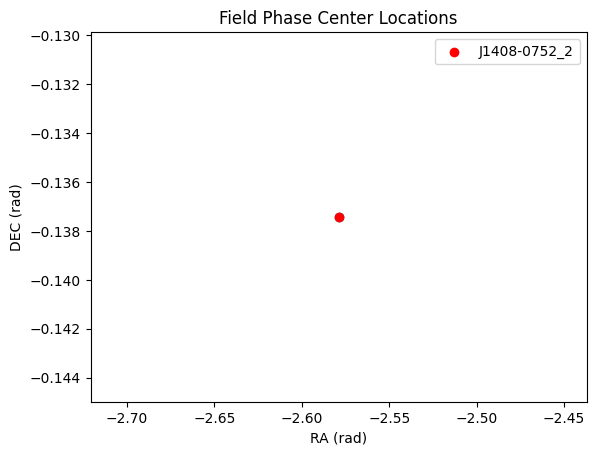

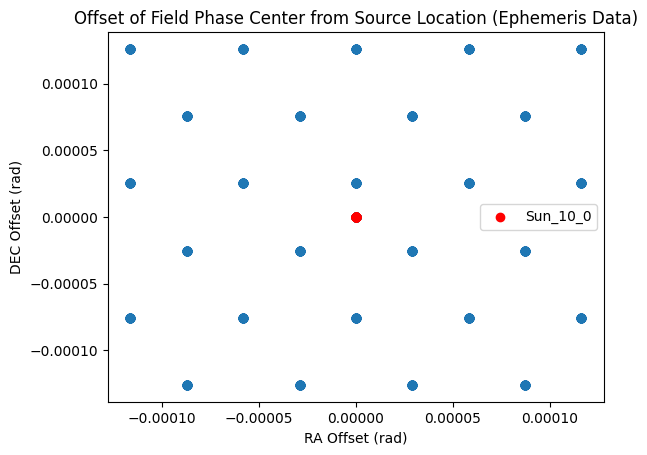

In [15]:
ps_xdt.xr_ps.plot_phase_centers()

## PS Methods: Antenna

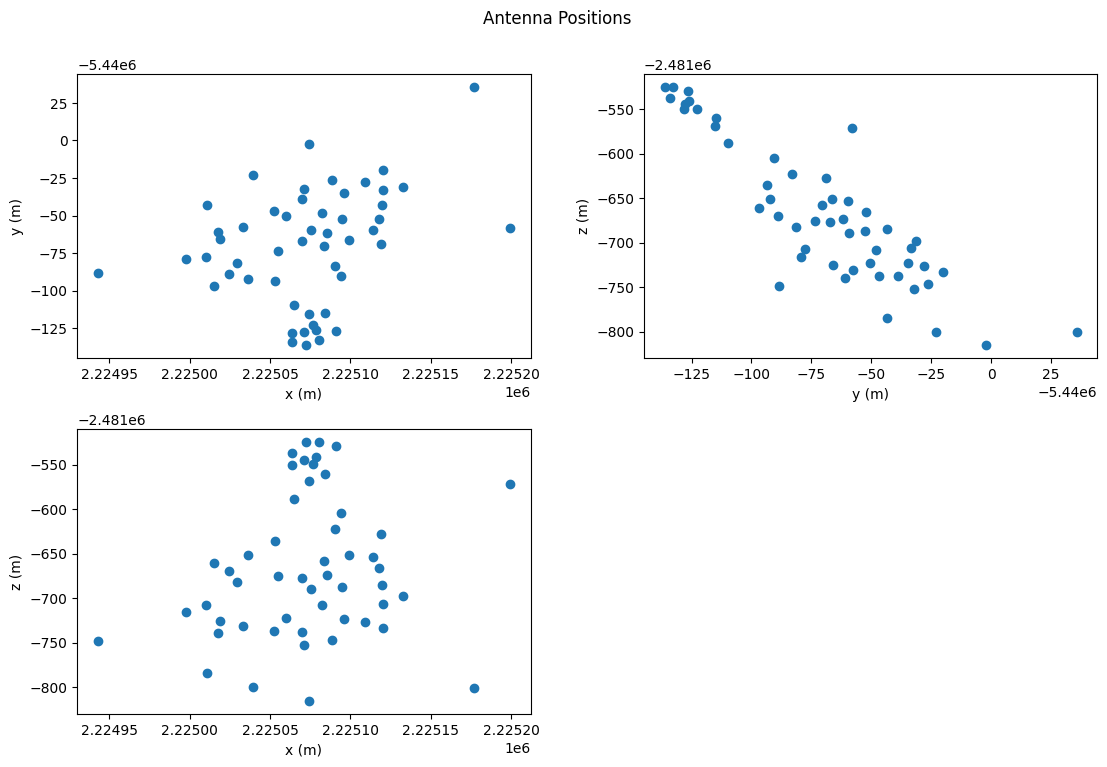

In [16]:
ps_xdt.xr_ps.plot_antenna_positions()

## MSv4 vs MSv2

- An MS v4 is fully self-describing and contains the information for a single observation, spectral window, polarization setup, observation mode, processor, and beam per antenna.
- Data is stored in Datasets of labeled n-dimensional arrays (called data variables) instead of tables.
- The table concept of rows has been replaced by relevant dimensions. For example, the VISIBILITY column in the MAIN table of MS v2 is now an n-dimensional array with dimensions time x baseline x frequency x polarization (row has been split into time x baseline).

## MSv4

<div style="text-align: center;">
    <figure id="figure-1" style="display: inline-block;">
        <img src="https://docs.google.com/drawings/d/e/2PACX-1vQVgjF5xNeIv8gpi2G3R8JXw2bNkVIUXdizIZluCGdnHc4z79ryW2fNUycJAd_CQh9sXLwdlx1oiAAX/pub?w=690&amp;h=510"
             alt="Processing Set and MS v4 schema layout."
             style="display: block; margin: auto;">
        <figcaption>Figure 1: Processing Set and MS v4 schema layout. Optional datasets are indicated by round brackets. Data variables are capitalized. The suffix '_xds' denotes an xarray dataset, while '_info' indicates dictionaries.</figcaption>
    </figure>
</div>

In [17]:
ms_xdt = ps_xdt[
    "ALMA_uid___A002_X1003af4_X75a3.split.avg_70"
]
ms_xdt

<xarray.DataTree 'ALMA_uid___A002_X1003af4_X75a3.split.avg_70'>
Group: /ALMA_uid___A002_X1003af4_X75a3.split.avg_70
│   Dimensions:                     (time: 9, baseline_id: 1326, frequency: 7,
│                                    polarization: 2, uvw_label: 3)
│   Coordinates:
│       baseline_antenna1_name      (baseline_id) <U9 48kB ...
│       baseline_antenna2_name      (baseline_id) <U9 48kB ...
│     * baseline_id                 (baseline_id) int64 11kB 0 1 2 ... 1324 1325
│       field_name                  (time) <U28 1kB ...
│     * frequency                   (frequency) float64 56B 2.3e+11 ... 2.301e+11
│     * polarization                (polarization) <U2 16B 'XX' 'YY'
│       scan_name                   (time) <U21 756B '8' '8' '8' '8' ... '8' '8' '8'
│     * time                        (time) float64 72B 1.667e+09 ... 1.667e+09
│     * uvw_label                   (uvw_label) <U1 12B 'u' 'v' 'w'
│   Data variables:
│       EFFECTIVE_INTEGRATION_TIME  (time, baseline_id) float64 95kB ...
│       FLAG                        (time, baseline_id, frequency, polarization) bool 167kB ...
│       TIME_CENTROID               (time, baseline_id) float64 95kB ...
│       UVW                         (time, baseline_id, uvw_label) float64 286kB ...
│       VISIBILITY                  (time, baseline_id, frequency, polarization) complex64 1MB ...
│       WEIGHT                      (time, baseline_id, frequency, polarization) float32 668kB ...
│   Attributes:
│       creation_date:     2025-08-07T15:08:51.838081+00:00
│       creator:           {'software_name': 'xradio', 'version': '0.0.56'}
│       data_groups:       {'base': {'correlated_data': 'VISIBILITY', 'date': '20...
│       observation_info:  {'intents': ['OBSERVE_TARGET#ON_SOURCE'], 'observer': ...
│       processor_info:    {'sub_type': 'ALMA_BASELINE', 'type': 'CORRELATOR'}
│       schema_version:    4.0.-9988
│       type:              visibility
├── Group: /ALMA_uid___A002_X1003af4_X75a3.split.avg_70/antenna_xds
│       Dimensions:                 (antenna_name: 51, cartesian_pos_label: 3,
│                                    receptor_label: 2)
│       Coordinates:
│         * antenna_name            (antenna_name) <U9 2kB 'CM01_N602' ... 'DV25_A011'
│         * cartesian_pos_label     (cartesian_pos_label) <U1 12B 'x' 'y' 'z'
│           mount                   (antenna_name) <U6 1kB ...
│           polarization_type       (antenna_name, receptor_label) <U1 408B ...
│         * receptor_label          (receptor_label) <U5 40B 'pol_0' 'pol_1'
│           station_name            (antenna_name) <U4 816B ...
│           telescope_name          (antenna_name) <U4 816B ...
│       Data variables:
│           ANTENNA_DISH_DIAMETER   (antenna_name) float64 408B ...
│           ANTENNA_POSITION        (antenna_name, cartesian_pos_label) float64 1kB ...
│           ANTENNA_RECEPTOR_ANGLE  (antenna_name, receptor_label) float64 816B ...
│       Attributes:
│           overall_telescope_name:  ALMA
│           relocatable_antennas:    True
│           type:                    antenna
├── Group: /ALMA_uid___A002_X1003af4_X75a3.split.avg_70/field_and_source_base_xds
│       Dimensions:                       (time: 9, sky_pos_label: 3,
│                                          time_ephemeris: 2, line_label: 1,
│                                          ellipsoid_pos_label: 3, sky_dir_label: 2)
│       Coordinates:
│         * ellipsoid_pos_label           (ellipsoid_pos_label) <U4 48B 'lon' ... 'dist'
│           field_name                    (time) <U28 1kB 'Sun_10_4' ... 'Sun_10_4'
│         * line_label                    (line_label) <U21 84B '0'
│           line_name                     (time, line_label) <U22 792B 'Single_Contin...
│         * sky_dir_label                 (sky_dir_label) <U3 24B 'ra' 'dec'
│         * sky_pos_label                 (sky_pos_label) <U4 48B 'ra' 'dec' 'dist'
│           source_name                   (time) <U28 1kB 'Sun_10_0' ... 'Sun

In [18]:
ms_xds = ms_xdt.ds
ms_xds

<xarray.DatasetView> Size: 3MB
Dimensions:                     (time: 9, baseline_id: 1326, frequency: 7,
                                 polarization: 2, uvw_label: 3)
Coordinates:
    baseline_antenna1_name      (baseline_id) <U9 48kB ...
    baseline_antenna2_name      (baseline_id) <U9 48kB ...
  * baseline_id                 (baseline_id) int64 11kB 0 1 2 ... 1324 1325
    field_name                  (time) <U28 1kB ...
  * frequency                   (frequency) float64 56B 2.3e+11 ... 2.301e+11
  * polarization                (polarization) <U2 16B 'XX' 'YY'
    scan_name                   (time) <U21 756B '8' '8' '8' '8' ... '8' '8' '8'
  * time                        (time) float64 72B 1.667e+09 ... 1.667e+09
  * uvw_label                   (uvw_label) <U1 12B 'u' 'v' 'w'
Data variables:
    EFFECTIVE_INTEGRATION_TIME  (time, baseline_id) float64 95kB ...
    FLAG                        (time, baseline_id, frequency, polarization) bool 167kB ...
    TIME_CENTROID               (time, baseline_id) float64 95kB ...
    UVW                         (time, baseline_id, uvw_label) float64 286kB ...
    VISIBILITY                  (time, baseline_id, frequency, polarization) complex64 1MB ...
    WEIGHT                      (time, baseline_id, frequency, polarization) float32 668kB ...
Attributes:
    creation_date:     2025-08-07T15:08:51.838081+00:00
    creator:           {'software_name': 'xradio', 'version': '0.0.56'}
    data_groups:       {'base': {'correlated_data': 'VISIBILITY', 'date': '20...
    observation_info:  {'intents': ['OBSERVE_TARGET#ON_SOURCE'], 'observer': ...
    processor_info:    {'sub_type': 'ALMA_BASELINE', 'type': 'CORRELATOR'}
    schema_version:    4.0.-9988
    type:              visibility

### MSv4: Coordinates

In [19]:
ms_xds.time

<xarray.DataArray 'time' (time: 9)> Size: 72B
array([1.666705e+09, 1.666705e+09, 1.666705e+09, 1.666705e+09, 1.666705e+09,
       1.666705e+09, 1.666705e+09, 1.666705e+09, 1.666705e+09])
Coordinates:
    field_name  (time) <U28 1kB ...
    scan_name   (time) <U21 756B '8' '8' '8' '8' '8' '8' '8' '8' '8'
  * time        (time) float64 72B 1.667e+09 1.667e+09 ... 1.667e+09 1.667e+09
Attributes:
    format:            unix
    integration_time:  {'attrs': {'type': 'quantity', 'units': ['s']}, 'data'...
    scale:             utc
    type:              time
    units:             ['s']

### MSv4: Data Variables

In [20]:
ms_xds.WEIGHT

<xarray.DataArray 'WEIGHT' (time: 9, baseline_id: 1326, frequency: 7,
                            polarization: 2)> Size: 668kB
[167076 values with dtype=float32]
Coordinates:
    baseline_antenna1_name  (baseline_id) <U9 48kB ...
    baseline_antenna2_name  (baseline_id) <U9 48kB ...
  * baseline_id             (baseline_id) int64 11kB 0 1 2 3 ... 1323 1324 1325
    field_name              (time) <U28 1kB ...
  * frequency               (frequency) float64 56B 2.3e+11 ... 2.301e+11
  * polarization            (polarization) <U2 16B 'XX' 'YY'
    scan_name               (time) <U21 756B '8' '8' '8' '8' '8' '8' '8' '8' '8'
  * time                    (time) float64 72B 1.667e+09 1.667e+09 ... 1.667e+09
Attributes:
    type:     quanta
    units:    ['unkown']

In [21]:
ms_xds.VISIBILITY

<xarray.DataArray 'VISIBILITY' (time: 9, baseline_id: 1326, frequency: 7,
                                polarization: 2)> Size: 1MB
[167076 values with dtype=complex64]
Coordinates:
    baseline_antenna1_name  (baseline_id) <U9 48kB ...
    baseline_antenna2_name  (baseline_id) <U9 48kB ...
  * baseline_id             (baseline_id) int64 11kB 0 1 2 3 ... 1323 1324 1325
    field_name              (time) <U28 1kB ...
  * frequency               (frequency) float64 56B 2.3e+11 ... 2.301e+11
  * polarization            (polarization) <U2 16B 'XX' 'YY'
    scan_name               (time) <U21 756B '8' '8' '8' '8' '8' '8' '8' '8' '8'
  * time                    (time) float64 72B 1.667e+09 1.667e+09 ... 1.667e+09
Attributes:
    type:     quanta
    units:    ['unkown']

In [22]:
import numpy as np
np.abs(ms_xds.VISIBILITY).max().compute()

<xarray.DataArray 'VISIBILITY' ()> Size: 4B
array(1.5041896, dtype=float32)

### MSv4 sub-xds: antenna_xds

The MSv4 has xarray datasets in its attributes that represent metadata where n-dimensional arrays is included. Some examples are the `antenna_xds`, `weather_xds` and `pointing_xds`. This would be the equivalent to some subtables of the MSv2. Let's look into the antenna sub-xds:


In [23]:
ant_xds = ms_xdt["antenna_xds"]
ant_xds

<xarray.DataTree 'antenna_xds'>
Group: /ALMA_uid___A002_X1003af4_X75a3.split.avg_70/antenna_xds
    Dimensions:                 (time: 9, baseline_id: 1326, frequency: 7,
                                 polarization: 2, uvw_label: 3, antenna_name: 51,
                                 cartesian_pos_label: 3, receptor_label: 2)
    Coordinates:
      * antenna_name            (antenna_name) <U9 2kB 'CM01_N602' ... 'DV25_A011'
      * cartesian_pos_label     (cartesian_pos_label) <U1 12B 'x' 'y' 'z'
        mount                   (antenna_name) <U6 1kB ...
        polarization_type       (antenna_name, receptor_label) <U1 408B ...
      * receptor_label          (receptor_label) <U5 40B 'pol_0' 'pol_1'
        station_name            (antenna_name) <U4 816B ...
        telescope_name          (antenna_name) <U4 816B ...
    Inherited coordinates:
      * baseline_id             (baseline_id) int64 11kB 0 1 2 3 ... 1323 1324 1325
      * frequency               (frequency) float64 56B 2.3e+11 ... 2.301e+11
      * polarization            (polarization) <U2 16B 'XX' 'YY'
      * time                    (time) float64 72B 1.667e+09 1.667e+09 ... 1.667e+09
      * uvw_label               (uvw_label) <U1 12B 'u' 'v' 'w'
    Data variables:
        ANTENNA_DISH_DIAMETER   (antenna_name) float64 408B ...
        ANTENNA_POSITION        (antenna_name, cartesian_pos_label) float64 1kB ...
        ANTENNA_RECEPTOR_ANGLE  (antenna_name, receptor_label) float64 816B ...
    Attributes:
        overall_telescope_name:  ALMA
        relocatable_antennas:    True
        type:                    antenna

As an xarray dataset, the antenna sub-xds can be used via the same API as the main xds.

## Data Selection Examples

One can use the usual selection functionality of xarray with all arrays, the main dataset and all sub datasets. For example, selection by labels, `sel()`:

In [24]:
ms_xds.frequency

<xarray.DataArray 'frequency' (frequency: 7)> Size: 56B
array([2.299609e+11, 2.299766e+11, 2.299922e+11, 2.300078e+11, 2.300234e+11,
       2.300391e+11, 2.300547e+11])
Coordinates:
  * frequency  (frequency) float64 56B 2.3e+11 2.3e+11 ... 2.3e+11 2.301e+11
Attributes:
    channel_width:         {'attrs': {'type': 'quantity', 'units': ['Hz']}, '...
    observer:              TOPO
    reference_frequency:   {'attrs': {'observer': 'TOPO', 'type': 'spectral_c...
    spectral_window_id:    2
    spectral_window_name:  X767114449#ALMA_RB_06#BB_1#SW-01#FULL_RES_2
    type:                  spectral_coord
    units:                 ['Hz']

In [25]:
sel_xds = ms_xds.sel(frequency=slice(2.2997e+11, 2.3001e+11))
sel_xds.frequency

<xarray.DataArray 'frequency' (frequency: 3)> Size: 24B
array([2.299766e+11, 2.299922e+11, 2.300078e+11])
Coordinates:
  * frequency  (frequency) float64 24B 2.3e+11 2.3e+11 2.3e+11
Attributes:
    channel_width:         {'attrs': {'type': 'quantity', 'units': ['Hz']}, '...
    observer:              TOPO
    reference_frequency:   {'attrs': {'observer': 'TOPO', 'type': 'spectral_c...
    spectral_window_id:    2
    spectral_window_name:  X767114449#ALMA_RB_06#BB_1#SW-01#FULL_RES_2
    type:                  spectral_coord
    units:                 ['Hz']

Or selection by indices, `isel()`

In [26]:
isel_xds = ms_xds.isel(frequency=slice(1, 4))
isel_xds.frequency

<xarray.DataArray 'frequency' (frequency: 3)> Size: 24B
array([2.299766e+11, 2.299922e+11, 2.300078e+11])
Coordinates:
  * frequency  (frequency) float64 24B 2.3e+11 2.3e+11 2.3e+11
Attributes:
    channel_width:         {'attrs': {'type': 'quantity', 'units': ['Hz']}, '...
    observer:              TOPO
    reference_frequency:   {'attrs': {'observer': 'TOPO', 'type': 'spectral_c...
    spectral_window_id:    2
    spectral_window_name:  X767114449#ALMA_RB_06#BB_1#SW-01#FULL_RES_2
    type:                  spectral_coord
    units:                 ['Hz']

## MSv4: Data Groups

The `correlated_xds` can contain multiple copies of `VISIBILITY`/`SPECTRUM`, `UVW`, `WEIGHT`, and `FLAG` data variables. To maintain the relationship between a set of data variables, a `data_group` dictionary is used with fixed lowercase keys: 'correlated_data', 'uvw', 'weight', and 'flag'. 

In [27]:
ms_xds

<xarray.DatasetView> Size: 3MB
Dimensions:                     (time: 9, baseline_id: 1326, frequency: 7,
                                 polarization: 2, uvw_label: 3)
Coordinates:
    baseline_antenna1_name      (baseline_id) <U9 48kB ...
    baseline_antenna2_name      (baseline_id) <U9 48kB ...
  * baseline_id                 (baseline_id) int64 11kB 0 1 2 ... 1324 1325
    field_name                  (time) <U28 1kB ...
  * frequency                   (frequency) float64 56B 2.3e+11 ... 2.301e+11
  * polarization                (polarization) <U2 16B 'XX' 'YY'
    scan_name                   (time) <U21 756B '8' '8' '8' '8' ... '8' '8' '8'
  * time                        (time) float64 72B 1.667e+09 ... 1.667e+09
  * uvw_label                   (uvw_label) <U1 12B 'u' 'v' 'w'
Data variables:
    EFFECTIVE_INTEGRATION_TIME  (time, baseline_id) float64 95kB ...
    FLAG                        (time, baseline_id, frequency, polarization) bool 167kB ...
    TIME_CENTROID               (time, baseline_id) float64 95kB ...
    UVW                         (time, baseline_id, uvw_label) float64 286kB ...
    VISIBILITY                  (time, baseline_id, frequency, polarization) complex64 1MB ...
    WEIGHT                      (time, baseline_id, frequency, polarization) float32 668kB ...
Attributes:
    creation_date:     2025-08-07T15:08:51.838081+00:00
    creator:           {'software_name': 'xradio', 'version': '0.0.56'}
    data_groups:       {'base': {'correlated_data': 'VISIBILITY', 'date': '20...
    observation_info:  {'intents': ['OBSERVE_TARGET#ON_SOURCE'], 'observer': ...
    processor_info:    {'sub_type': 'ALMA_BASELINE', 'type': 'CORRELATOR'}
    schema_version:    4.0.-9988
    type:              visibility

In [28]:
ms_xds.data_groups

{'base': {'correlated_data': 'VISIBILITY',
  'date': '2025-08-07T15:08:52.567813+00:00',
  'description': "Data group derived from the data column 'VISIBILITY' of an MSv2 converted to MSv4",
  'field_and_source': 'field_and_source_base_xds',
  'flag': 'FLAG',
  'uvw': 'UVW',
  'weight': 'WEIGHT'}}

In [29]:
ms_xdt = ms_xdt.xr_ms.add_data_group(new_data_group_name="corrected", correlated_data="VISIBILITY", weight="WEIGHT", description="new data group being added") 
ms_xds.data_groups

{'base': {'correlated_data': 'VISIBILITY',
  'date': '2025-08-07T15:08:52.567813+00:00',
  'description': "Data group derived from the data column 'VISIBILITY' of an MSv2 converted to MSv4",
  'field_and_source': 'field_and_source_base_xds',
  'flag': 'FLAG',
  'uvw': 'UVW',
  'weight': 'WEIGHT'},
 'corrected': {'correlated_data': 'VISIBILITY',
  'weight': 'WEIGHT',
  'flag': 'FLAG',
  'uvw': 'UVW',
  'field_and_source': 'field_and_source_base_xds',
  'date': '2025-08-12T12:15:41.881263+00:00',
  'description': 'new data group being added'}}

In [30]:
ms_xds

<xarray.DatasetView> Size: 3MB
Dimensions:                     (time: 9, baseline_id: 1326, frequency: 7,
                                 polarization: 2, uvw_label: 3)
Coordinates:
    baseline_antenna1_name      (baseline_id) <U9 48kB ...
    baseline_antenna2_name      (baseline_id) <U9 48kB ...
  * baseline_id                 (baseline_id) int64 11kB 0 1 2 ... 1324 1325
    field_name                  (time) <U28 1kB ...
  * frequency                   (frequency) float64 56B 2.3e+11 ... 2.301e+11
  * polarization                (polarization) <U2 16B 'XX' 'YY'
    scan_name                   (time) <U21 756B '8' '8' '8' '8' ... '8' '8' '8'
  * time                        (time) float64 72B 1.667e+09 ... 1.667e+09
  * uvw_label                   (uvw_label) <U1 12B 'u' 'v' 'w'
Data variables:
    EFFECTIVE_INTEGRATION_TIME  (time, baseline_id) float64 95kB ...
    FLAG                        (time, baseline_id, frequency, polarization) bool 167kB ...
    TIME_CENTROID               (time, baseline_id) float64 95kB ...
    UVW                         (time, baseline_id, uvw_label) float64 286kB ...
    VISIBILITY                  (time, baseline_id, frequency, polarization) complex64 1MB ...
    WEIGHT                      (time, baseline_id, frequency, polarization) float32 668kB ...
Attributes:
    creation_date:     2025-08-07T15:08:51.838081+00:00
    creator:           {'software_name': 'xradio', 'version': '0.0.56'}
    data_groups:       {'base': {'correlated_data': 'VISIBILITY', 'date': '20...
    observation_info:  {'intents': ['OBSERVE_TARGET#ON_SOURCE'], 'observer': ...
    processor_info:    {'sub_type': 'ALMA_BASELINE', 'type': 'CORRELATOR'}
    schema_version:    4.0.-9988
    type:              visibility

In [31]:
ms_corrected_xdt = ms_xdt.xr_ms.sel(data_group_name="corrected")
ms_corrected_xdt

<xarray.DataTree 'ALMA_uid___A002_X1003af4_X75a3.split.avg_70'>
Group: /ALMA_uid___A002_X1003af4_X75a3.split.avg_70
│   Dimensions:                     (time: 9, baseline_id: 1326, frequency: 7,
│                                    polarization: 2, uvw_label: 3)
│   Coordinates:
│       baseline_antenna1_name      (baseline_id) <U9 48kB ...
│       baseline_antenna2_name      (baseline_id) <U9 48kB ...
│     * baseline_id                 (baseline_id) int64 11kB 0 1 2 ... 1324 1325
│       field_name                  (time) <U28 1kB ...
│     * frequency                   (frequency) float64 56B 2.3e+11 ... 2.301e+11
│     * polarization                (polarization) <U2 16B 'XX' 'YY'
│       scan_name                   (time) <U21 756B '8' '8' '8' '8' ... '8' '8' '8'
│     * time                        (time) float64 72B 1.667e+09 ... 1.667e+09
│     * uvw_label                   (uvw_label) <U1 12B 'u' 'v' 'w'
│   Data variables:
│       EFFECTIVE_INTEGRATION_TIME  (time, baseline_id) float64 95kB ...
│       FLAG                        (time, baseline_id, frequency, polarization) bool 167kB ...
│       TIME_CENTROID               (time, baseline_id) float64 95kB ...
│       UVW                         (time, baseline_id, uvw_label) float64 286kB ...
│       VISIBILITY                  (time, baseline_id, frequency, polarization) complex64 1MB ...
│       WEIGHT                      (time, baseline_id, frequency, polarization) float32 668kB ...
│   Attributes:
│       creation_date:     2025-08-07T15:08:51.838081+00:00
│       creator:           {'software_name': 'xradio', 'version': '0.0.56'}
│       data_groups:       {'corrected': {'correlated_data': 'VISIBILITY', 'weigh...
│       observation_info:  {'intents': ['OBSERVE_TARGET#ON_SOURCE'], 'observer': ...
│       processor_info:    {'sub_type': 'ALMA_BASELINE', 'type': 'CORRELATOR'}
│       schema_version:    4.0.-9988
│       type:              visibility
├── Group: /ALMA_uid___A002_X1003af4_X75a3.split.avg_70/antenna_xds
│       Dimensions:                 (antenna_name: 51, cartesian_pos_label: 3,
│                                    receptor_label: 2)
│       Coordinates:
│         * antenna_name            (antenna_name) <U9 2kB 'CM01_N602' ... 'DV25_A011'
│         * cartesian_pos_label     (cartesian_pos_label) <U1 12B 'x' 'y' 'z'
│           mount                   (antenna_name) <U6 1kB ...
│           polarization_type       (antenna_name, receptor_label) <U1 408B ...
│         * receptor_label          (receptor_label) <U5 40B 'pol_0' 'pol_1'
│           station_name            (antenna_name) <U4 816B ...
│           telescope_name          (antenna_name) <U4 816B ...
│       Data variables:
│           ANTENNA_DISH_DIAMETER   (antenna_name) float64 408B ...
│           ANTENNA_POSITION        (antenna_name, cartesian_pos_label) float64 1kB ...
│           ANTENNA_RECEPTOR_ANGLE  (antenna_name, receptor_label) float64 816B ...
│       Attributes:
│           overall_telescope_name:  ALMA
│           relocatable_antennas:    True
│           type:                    antenna
├── Group: /ALMA_uid___A002_X1003af4_X75a3.split.avg_70/field_and_source_base_xds
│       Dimensions:                       (time: 9, sky_pos_label: 3,
│                                          time_ephemeris: 2, line_label: 1,
│                                          ellipsoid_pos_label: 3, sky_dir_label: 2)
│       Coordinates:
│         * ellipsoid_pos_label           (ellipsoid_pos_label) <U4 48B 'lon' ... 'dist'
│           field_name                    (time) <U28 1kB 'Sun_10_4' ... 'Sun_10_4'
│         * line_label                    (line_label) <U21 84B '0'
│           line_name                     (time, line_label) <U22 792B 'Single_Contin...
│         * sky_dir_label                 (sky_dir_label) <U3 24B 'ra' 'dec'
│         * sky_pos_label                 (sky_pos_label) <U4 48B 'ra' 'dec' 'dist'
│           source_name                   (time) <U28 1kB 'Sun_10_0' ... 'Sun

## Saving to Disk

In [ ]:
# Save one MSv4
output_name = "ALMA_corrected.vis.zarr"
ms_corrected_xdt.to_zarr(store=output_name, mode="w")

In [33]:
import xarray as xr
ms_new_xdt = xr.open_datatree(output_name, engine="zarr")
ms_new_xdt.xr_ms.get_partition_info()

{'spectral_window_name': 'X767114449#ALMA_RB_06#BB_1#SW-01#FULL_RES_2',
 'field_name': [np.str_('Sun_10_4')],
 'polarization_setup': [np.str_('XX'), np.str_('YY')],
 'scan_name': [np.str_('8')],
 'source_name': [np.str_('Sun_10_0')],
 'intents': ['OBSERVE_TARGET#ON_SOURCE'],
 'line_name': [np.str_('Single_Continuum(ID=0)')],
 'data_group_name': 'corrected'}

In [35]:
# Save new MSv4 in a Processing Set DataTree
output_ps_name = "ALMA_corrected.ps.zarr"
new_ps_xdt = xr.DataTree()
new_ps_xdt["ALMA_corrected_new_00"] = ms_corrected_xdt
new_ps_xdt.to_zarr(store=output_ps_name)

In [36]:
ps_reloaded_xdt = open_processing_set(output_ps_name)
ps_reloaded_xdt

<xarray.DataTree>
Group: /
└── Group: /ALMA_corrected_new_00
    │   Dimensions:                     (time: 9, baseline_id: 1326, frequency: 7,
    │                                    polarization: 2, uvw_label: 3)
    │   Coordinates:
    │       baseline_antenna1_name      (baseline_id) <U9 48kB ...
    │       baseline_antenna2_name      (baseline_id) <U9 48kB ...
    │     * baseline_id                 (baseline_id) int64 11kB 0 1 2 ... 1324 1325
    │       field_name                  (time) <U28 1kB ...
    │     * frequency                   (frequency) float64 56B 2.3e+11 ... 2.301e+11
    │     * polarization                (polarization) <U2 16B 'XX' 'YY'
    │       scan_name                   (time) <U21 756B ...
    │     * time                        (time) float64 72B 1.667e+09 ... 1.667e+09
    │     * uvw_label                   (uvw_label) <U1 12B 'u' 'v' 'w'
    │   Data variables:
    │       EFFECTIVE_INTEGRATION_TIME  (time, baseline_id) float64 95kB ...
    │       FLAG                        (time, baseline_id, frequency, polarization) bool 167kB ...
    │       TIME_CENTROID               (time, baseline_id) float64 95kB ...
    │       UVW                         (time, baseline_id, uvw_label) float64 286kB ...
    │       VISIBILITY                  (time, baseline_id, frequency, polarization) complex64 1MB ...
    │       WEIGHT                      (time, baseline_id, frequency, polarization) float32 668kB ...
    │   Attributes:
    │       creation_date:     2025-08-07T15:08:51.838081+00:00
    │       creator:           {'software_name': 'xradio', 'version': '0.0.56'}
    │       data_groups:       {'corrected': {'correlated_data': 'VISIBILITY', 'date'...
    │       observation_info:  {'intents': ['OBSERVE_TARGET#ON_SOURCE'], 'observer': ...
    │       processor_info:    {'sub_type': 'ALMA_BASELINE', 'type': 'CORRELATOR'}
    │       schema_version:    4.0.-9988
    │       type:              visibility
    ├── Group: /ALMA_corrected_new_00/antenna_xds
    │       Dimensions:                 (antenna_name: 51, cartesian_pos_label: 3,
    │                                    receptor_label: 2)
    │       Coordinates:
    │         * antenna_name            (antenna_name) <U9 2kB 'CM01_N602' ... 'DV25_A011'
    │         * cartesian_pos_label     (cartesian_pos_label) <U1 12B 'x' 'y' 'z'
    │           mount                   (antenna_name) <U6 1kB ...
    │           polarization_type       (antenna_name, receptor_label) <U1 408B ...
    │         * receptor_label          (receptor_label) <U5 40B 'pol_0' 'pol_1'
    │           station_name            (antenna_name) <U4 816B ...
    │           telescope_name          (antenna_name) <U4 816B ...
    │       Data variables:
    │           ANTENNA_DISH_DIAMETER   (antenna_name) float64 408B ...
    │           ANTENNA_POSITION        (antenna_name, cartesian_pos_label) float64 1kB ...
    │           ANTENNA_RECEPTOR_ANGLE  (antenna_name, receptor_label) float64 816B ...
    │       Attributes:
    │           overall_telescope_name:  ALMA
    │           relocatable_antennas:    True
    │           type:                    antenna
    ├── Group: /ALMA_corrected_new_00/field_and_source_base_xds
    │       Dimensions:                       (time: 9, sky_pos_label: 3,
    │                                          time_ephemeris: 2, line_label: 1,
    │                                          ellipsoid_pos_label: 3, sky_dir_label: 2)
    │       Coordinates:
    │         * ellipsoid_pos_label           (ellipsoid_pos_label) <U4 48B 'lon' ... 'dist'
    │           field_name                    (time) <U28 1kB ...
    │         * line_label                    (line_label) <U21 84B '0'
    │           line_name                     (time, line_label) <U22 792B ...
    │         * sky_dir_label                 (sky_dir_label) <U3 24B 'ra' 'dec'
    │         * sky_pos_label                 (sky_pos_label) <U4 48B 'ra' 'dec' 'dist'
    │       

In [37]:
7.75/3.75
4.25/2.25

1.8888888888888888

In [38]:
from toolviper.utils.data import download
download(file="feather.im")

[2025-08-12 14:23:56,019]     INFO    viperlog:  Downloading from [cloudflare] .... 


 Download List  
 ─────────────── 
  feather.im

[2025-08-12 14:23:56,033]     INFO    viperlog:  File exists: feather.im 


Output()

In [39]:
from toolviper.utils.data import list_files

list_files()

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ file                                    ┃ dtype          ┃ telescope   ┃ size      ┃ mode                       ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ ea25_cal_small_before_fixed.split.ms    │ CASA MS v2     │ VLA         │ 150170225 │ Holography                 │
├─────────────────────────────────────────┼────────────────┼─────────────┼───────────┼────────────────────────────┤
│ ea25_cal_small_after_fixed.split.ms     │ CASA MS v2     │ VLA         │ 150031008 │ Holography                 │
├─────────────────────────────────────────┼────────────────┼─────────────┼───────────┼────────────────────────────┤
│ J1924-2914.ms.calibrated.split.SPW3     │ CASA MS v2     │ ALMA        │ 35000000  │ Holography                 │
├─────────────────────────────────────────┼────────────────┼─────────────┼───────────┼────────────────────────────┤
│ extract_holog_verification.json         │ json           │ na          │ 967       │ na                         │
├─────────────────────────────────────────┼────────────────┼─────────────┼───────────┼────────────────────────────┤
│ holog_numerical_verification.json       │ json           │ na          │ 1033      │ na                         │
├─────────────────────────────────────────┼────────────────┼─────────────┼───────────┼────────────────────────────┤
│ locit-input-pha.cal                     │ CASA Cal Table │ VLA         │ 92293     │ antenna location cal table │
├─────────────────────────────────────────┼────────────────┼─────────────┼───────────┼────────────────────────────┤
│ panel_cutoff_mask                       │ npy            │ na          │ 27150     │ na                         │
├─────────────────────────────────────────┼────────────────┼─────────────┼───────────┼────────────────────────────┤
│ heuristic_model                         │ bin            │ na          │ 556       │ na                         │
├─────────────────────────────────────────┼────────────────┼─────────────┼───────────┼────────────────────────────┤
│ panel_test_files                        │ na             │ na          │ 402916    │ na                         │
├─────────────────────────────────────────┼────────────────┼─────────────┼───────────┼────────────────────────────┤
│ AA2-Mid-sim_00000.ms                    │ CASA MS v2     │ SKA Mid     │ 14710912  │ Simulated Interferometer   │
├─────────────────────────────────────────┼────────────────┼─────────────┼───────────┼────────────────────────────┤
│ Antennae_M8.img.zarr                    │ zarr           │ ALMA        │ 12626417  │ Interferometer Mosaic      │
├─────────────────────────────────────────┼────────────────┼─────────────┼───────────┼────────────────────────────┤
│ Antennae_North.cal.lsrk.ms              │ CASA MS v2     │ ALMA        │ 189716793 │ Interferometer Mosaic      │
├─────────────────────────────────────────┼────────────────┼─────────────┼───────────┼────────────────────────────┤
│ Antennae_North.cal.lsrk.split.ms        │ CASA MS v2     │ ALMA        │ 1560578   │ Interferometer Mosaic      │
├─────────────────────────────────────────┼────────────────┼─────────────┼───────────┼────────────────────────────┤
│ complex_valued_uv.im                    │ image          │ Simulated   │ 562110    │ Simulated                  │
├─────────────────────────────────────────┼────────────────┼─────────────┼───────────┼────────────────────────────┤
│ demo_simulated.im                       │ image          │ Simulated   │ 15321745  │ Simulated                  │
├─────────────────────────────────────────┼────────────────┼─────────────┼───────────┼────────────────────────────┤
│ no_mask.im                              │ image          │ Simulated   │ 4252      │ Simulated                  │
├─────────────────────────────────────────┼─────────────